In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def f(x):
    return 3*x**2 + 2*x + 5
f(3.0)

38.0

In [3]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

plt.plot(xs, ys)

<IPython.core.display.Javascript object>

In [4]:
class Value:
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self._prev = set(_children)
        self.grad = 0
        self._op = _op
        self.label = label

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out  = Value(self.data + other.data, (self, other), _op='+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), _op='*')
        return out

    def tanh(self):
        n = self.data
        t = (math.exp(2*n) - 1)/(math.exp(2*n)+1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(5.0, label='c')

d = a*b+c

In [5]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [6]:
# back propogation of neurons

In [7]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2)))

<IPython.core.display.Javascript object>

In [13]:
# inputs x1 and x2
x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

# weights w1 and w2
w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

# bias of neuron
b = Value(6.8813735870195432, label="b")

x1w1 = x1*w1; x1w1.label = "x1w1"
x2w2 = x2*w2; x2w2.label = "x2w2"
x1w1x2w2 = x1w1+x2w2; x1w1x2w2.label = "x1w1x2w2"
n = x1w1x2w2 + b; n.label = "n"
o = n.tanh(); o.label = 'o'

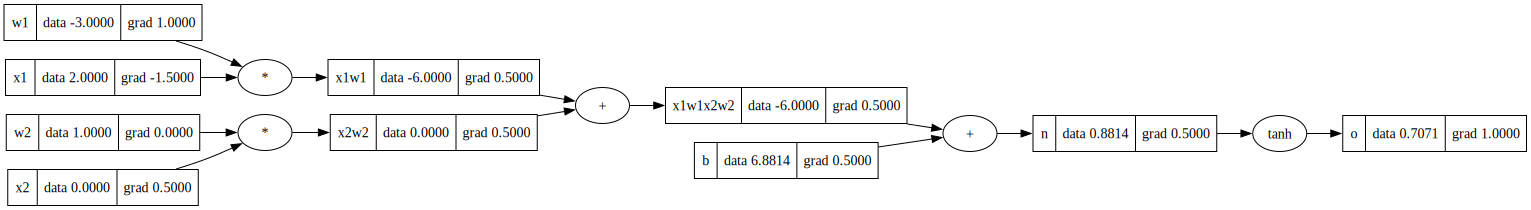

In [22]:
w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad
x1w1.grad = 0.5
x2w2.grad = 0.5
x1w1x2w2.grad = 0.5
b.grad = 0.5
n.grad = 0.5 # do/dn = 1 - tanh**2 = 1 - o.data**2
o.grad = 1.0
draw_dot(o)

In [18]:
# do/dn - back prop wrt n
1 - o.data**2

0.4999999999999999